In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!h5ls -v ../data/ttbar.h5

Opened "../data/ttbar.h5" with sec2 driver.
jets                     Dataset {5541240/Inf}
    Location:  1:800
    Links:     1
    Chunks:    {2048} 917504 bytes
    Storage:   2482475520 logical bytes, 1012711223 allocated bytes, 245.13% utilization
    Filter-0:  deflate-1 OPT {7}
    Type:      struct {
                   "GN120220509_pb"   +0    native float
                   "GN120220509_pc"   +4    native float
                   "GN120220509_pu"   +8    native float
                   "GN2v00_pb"        +12   native float
                   "GN2v00_pc"        +16   native float
                   "GN2v00_pu"        +20   native float
                   "GN2v01_pb"        +24   native float
                   "GN2v01_pc"        +28   native float
                   "GN2v01_pu"        +32   native float
                   "GN2v01_ptau"      +36   native float
                   "SV1_correctSignificance3d" +40   native float
                   "softMuon_pt"      +44   native flo

In [3]:
filename = "../data/ttbar.h5"

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    jet_pt = f['jets']['pt'] / 1000.0
    trk_pt = f['tracks']['pt'] / 1000.0

Keys: <KeysViewHDF5 ['jets', 'tracks']>


In [4]:
print(jet_pt[0])
print(trk_pt[0][0])

68.020775
0.8801454


In [5]:
num_trks_h = []
jet_pt_h = []
trk_pt_h = []
pt_ratio_h = []

pt_ratio_low_h = []
pt_ratio_mid_h = []
pt_ratio_high_h = []
num_trks_low_h = []
num_trks_mid_h = []
num_trks_high_h = []

total_trk=0
for i in range(len(jet_pt)):
    num_trk=0
    sum_pt=0
    jpt = jet_pt[i]
    jet_pt_h.append(jpt)
    
    for j in range(len(trk_pt[i])):
        tpt = trk_pt[i][j]
        # Check if trk is not NaN
        if tpt == tpt:
            num_trk+=1
            sum_pt+=tpt
            trk_pt_h.append(tpt)
            total_trk+=1
            
    num_trks_h.append(num_trk)
    pt_ratio_h.append(sum_pt/jpt)
    if jpt<40:
        num_trks_low_h.append(num_trk)
        pt_ratio_low_h.append(sum_pt/jpt)
    elif jpt<70:
        num_trks_mid_h.append(num_trk)
        pt_ratio_mid_h.append(sum_pt/jpt)
    elif jpt>=70:
        num_trks_high_h.append(num_trk)
        pt_ratio_high_h.append(sum_pt/jpt)
        
print("Number of Jets: ", len(jet_pt))
print("Number of Tracks: ", total_trk)

Number of Jets:  5541240
Number of Tracks:  41170351


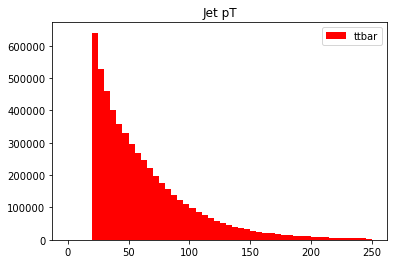

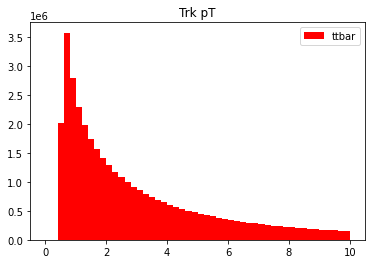

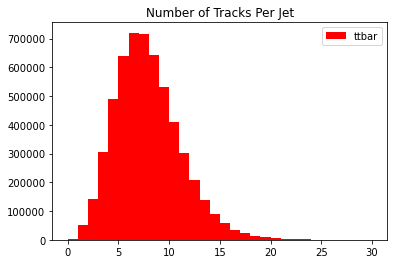

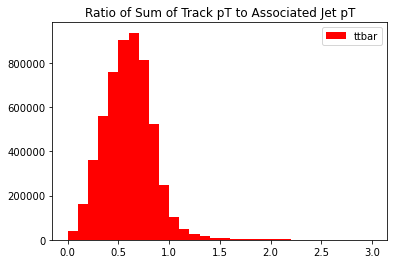

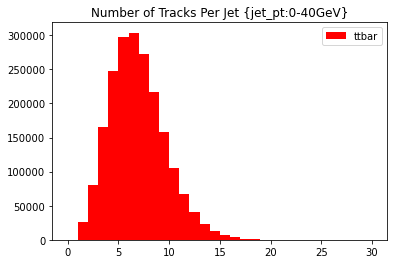

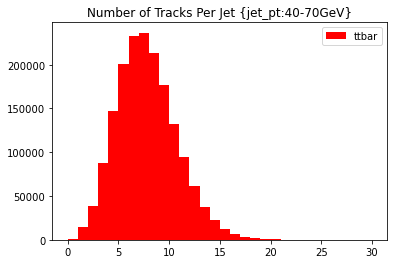

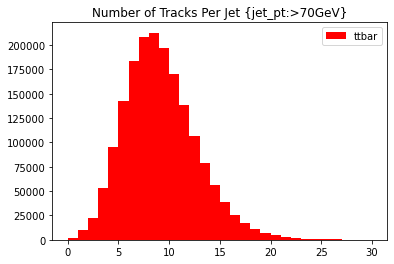

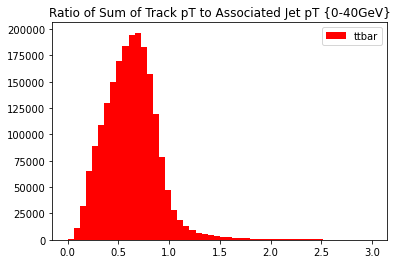

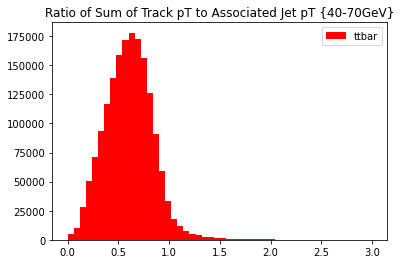

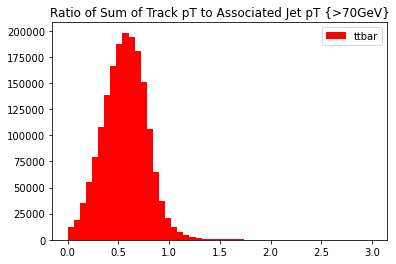

In [7]:
plt.hist(jet_pt_h, bins=50,range=(0,250),color='red')
plt.title("Jet pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(trk_pt_h, bins=50,color='red',range=(0,10))
plt.title("Trk pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_h, bins=30,color='red',range=(0,30))
plt.title("Number of Tracks Per Jet")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_h, bins=30,range=(0,3),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_low_h, bins=30,range=(0,30),color='red')
plt.title("Number of Tracks Per Jet {jet_pt:0-40GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_mid_h, bins=30,range=(0,30),color='red')
plt.title("Number of Tracks Per Jet {jet_pt:40-70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_high_h, bins=30,range=(0,30),color='red')
plt.title("Number of Tracks Per Jet {jet_pt:>70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_low_h, bins=50,range=(0,3),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {0-40GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_mid_h, bins=50,range=(0,3),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {40-70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_high_h, bins=50,range=(0,3),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {>70GeV}")
plt.legend(["ttbar"])
plt.show()